In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import skimage as ski

In [ ]:
image_path = '/Users/wouter/Documents/phd/projects/psychophysics/stimuli/wetransfer_simuli_2025-02-19_1115/SelectedStimuli/CrestTL'


Image with contours:


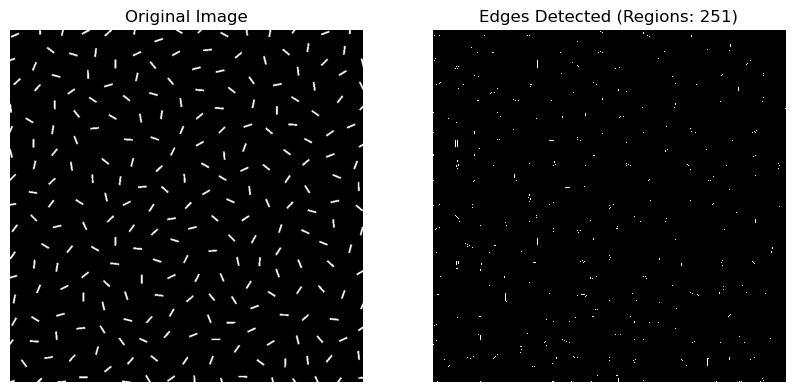

Connected components: 251, Avg. Eccentricity: 0.95

Image without contours:


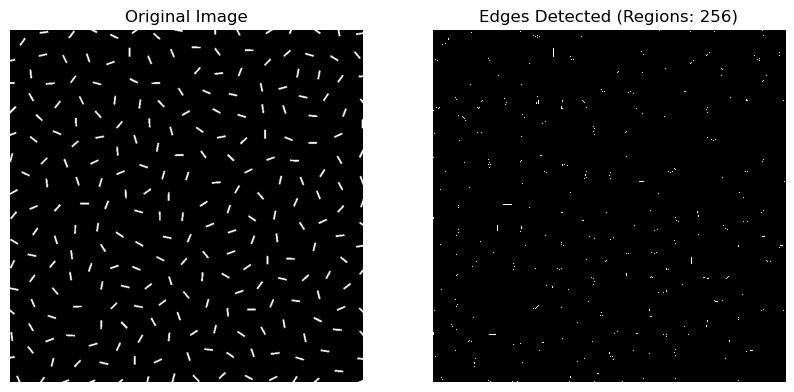

Connected components: 256, Avg. Eccentricity: 0.95


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, measure
from skimage.color import rgb2gray
from skimage.feature import canny

def analyze_continuity(image_path):
    # Load image
    image = io.imread(image_path)

    # Ensure proper grayscale conversion
    gray = None  # Initialize to avoid UnboundLocalError

    if image.ndim == 3:  # Color image
        if image.shape[-1] == 4:  # If RGBA, remove alpha channel
            image = image[:, :, :3]
        gray = rgb2gray(image)  # Convert to grayscale
    elif image.ndim == 2:  # Already grayscale
        gray = image
    else:
        raise ValueError(f"Unexpected image shape: {image.shape}")

    if gray is None:
        raise ValueError("Failed to convert image to grayscale.")

    # Apply Canny edge detection
    edges = canny(gray, sigma=1.5)

    # Label connected components
    labeled_edges, num_labels = measure.label(edges, connectivity=2, return_num=True)

    # Compute region properties
    region_props = measure.regionprops(labeled_edges)

    # Compute average eccentricity of detected components
    eccentricities = [region.eccentricity for region in region_props if region.area > 10]  # Filter small noise
    avg_eccentricity = np.mean(eccentricities) if eccentricities else 0

    # Visualize results
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image, cmap="gray" if gray.ndim == 2 else None)
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    ax[1].imshow(edges, cmap="gray", interpolation="nearest")
    ax[1].set_title(f"Edges Detected (Regions: {num_labels})")
    ax[1].axis("off")
    plt.show()

    return num_labels, avg_eccentricity

# Define image paths
image_with_contours = "/Users/wouter/Documents/phd/projects/psychophysics/stimuli/wetransfer_simuli_2025-02-19_1115/SelectedStimuli/CrestTL/CrestTL1_1.png"
image_without_contours = "/Users/wouter/Documents/phd/projects/psychophysics/stimuli/wetransfer_simuli_2025-02-19_1115/SelectedStimuli/EmptyBlack/NoshapeB_1.png"

# Analyze images
print("Image with contours:")
num_labels_with, avg_eccentricity_with = analyze_continuity(image_with_contours)
print(f"Connected components: {num_labels_with}, Avg. Eccentricity: {avg_eccentricity_with:.2f}\n")

print("Image without contours:")
num_labels_without, avg_eccentricity_without = analyze_continuity(image_without_contours)
print(f"Connected components: {num_labels_without}, Avg. Eccentricity: {avg_eccentricity_without:.2f}")